# Bernoulli and Binomial Distribution

## Introduction

Now that you learned about probability mass functions, probability density functions, and cumulative density functions (PMFs, PDFs, and CDFs, respectively), let's dive into the world of distributions! 

In this section, you'll learn about two foundational probability distributions that are extremely useful and have an endless amount of applications: the Bernoulli distribution and the Binomial distribution. You'll notice that these distributions formalize a lot of the theory you learned in the probability theory section! 


## Objectives

You will be able to:

* Describe the components of a Bernoulli distribution
* Describe how a Binomial Distribution is related to a Bernoulli Distribution
* Use `numpy` to randomly generate Binomial and Bernoulli trials
* Use `matplotlib` to show the output of generated Binomial and Bernoulli trials


## The Bernoulli or Binary distribution

In the previous sections, we discussed several probability theory situations regarding throwing a dice or flipping a coin. The Bernoulli distribution is a discrete distribution that formalizes the idea of a coin flip. 

The Bernoulli experiment is a simple experiment in which there is a binary
outcome: 0-1, success-failure, heads-tails, etc. 

If we were to model a coin flip with a Bernoulli distribution, we could say that 0 means heads, and 1 tails. With a fair coin, obtaining either value when performing a coin toss would have an assigned probability of 0.5. The Bernoulli experiment can also describe events with different probability structures. For example, let's say that the chance of scoring a penalty goal is 80%. Where $Y$ is the penalty outcome:

$Y = Bernoulli(p)$ and $p=P(Y=1)=0.8$.

The distribution is defined by 1 parameter, the parameter $p$, describing the chance of "success".

Let's look at the PMF and the CDF when $p=0.8$.

<img src="images/bernoulli_plot.png" width ="300">

As you can see these functions look pretty straightforward when you plot them.

Now, what is the mean and the variance of these functions? Recall that


$E(X) = \mu = \sum_i p(x_i)x_i= 0.2*0+0.8*1=0.8$

$ E((X-\mu)^2) = \sigma^2 = \sum_i p(x_i)(x_i-\mu)^2 = 0.2*(-0.8)^2+0.8*(0.2)^2 = (0.8*0.2)*(0.2+0.8) = 0.16$

A general rule for the Bernoulli distribution is that: $E(X)=p$ and $\sigma^2=p*(1-p)$.

Note how the Bernoulli distribution describes a single coin flip, a single penalty shot, etc. What if we repeat this process multiple times and are interested in the probability of obtaining a certain number of 1s/successes/tails? This process is described by the **binomial distribution**.

## The Binomial distribution

The binomial distribution describes the process of performing $n$ *independent* Bernoulli trials. So what does it mean that the trials are independent?

When we say that events are **independent, this means that an event is not affected by previous events**.

Applying this to our penalty goal example, this means that the assumption is that, when a soccer player misses a penalty and then tries again, the fact that he missed it the previous time does not affect his chances of making it now: the probability is still 80% ($p=0.8$)!


As we have a repeated Bernoulli experiment, the binomial distribution has two parameters: $p$ (the success probability) and $n$ (the number of times the experiment is repeated). We say that random variable $Y$ follows a Binomial distribution:
$ Y = bin(n, p)$. 


Now we're interested in finding an expression that gives us the probability to find each possible amount of successes $k$ between 0 and n. Going back to our goal penalties example, imagine we still have $p = 0.8$, but have 3 consecutive penalty shots. What is:
- $P(Y=0)$ (or the soccer player doesn't score a single time)?
- $P(Y=1)$ (or the soccer player scores exactly once)?
- $P(Y=2)$ (or the soccer player scores exactly twice)?
- $P(Y=3)$ (or the soccer player scores exactly three times)?


Calculating $P(Y=0)$ is pretty easy, it's simply $0.2*0.2*0.2$, so 0.008. 

Getting to $P(Y=1)$ is a little bit more complicated. It's essentially $0.8*0.2*0.2+0.2*0.8*0.2+ 0.2*0.2*0.8$, so it's the probability of scoring during the first shot, or the second shot, or the third shot. So essentially, its $3*(0.8*0.2*0.2)$. You can see how combinatorics play a role here! The general formula is given as follows:

$$ P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 


Where $k$ denotes the number of successes. Applying this on $P(Y=2)$ we get $$ P(Y=2)= \binom{3}{2} 0.8^2(1-0.8)^{(3-2)} = \dfrac{3!}{2!1!}*0.8^2 * 0.2^1 = 3*0.8^2*0.2$$ Repeating this for the other discrete values between 0 and 3, you get:

- $P(Y=0)=0.008$
- $P(Y=1)=0.096 $ 
- $P(Y=2)=0.384 $ 
- $P(Y=3)=0.512$ 


Note how they sum to one, which is exactly what's expected! Let's look at their PMF and CDF.


<img src="images/binomial_pl.png" width ="500">


Just like before, let's look at the mean and variance:

$E(X) = \mu = \sum_i p(x_i)x_i= 0.008*0+0.096*1+0.384*2+0.512*3 = 2.4 $

$ E((X-\mu)^2) = \sigma^2 = \sum_i p(x_i)(x_i-\mu)^2 =0.008*(-2.4)^2+0.096*(-1.4)^2+ 0.384*(-0.4)^2+0.512 *0.6^2 = 0.48$


Very similarly to Bernoulli, a general rule for the Binomial distribution is that: $E(X)=n*p$ and $\sigma^2=n*p*(1-p)$. You simply multiply your results with the number of trials $n$!

## Use NumPy to randomly generate Binomial and Bernoulli trials.

In the first part, you learned about Bernoulli and Binomial using their formulas to obtain the probability distributions.
You can also perform random sampling. What you're basically doing then is selecting a sample from a statistical population in a way that every possible sample has a predetermined probability of being selected.

Applied to our example, imagine that 1 represents scoring a penalty goal and 0 represents missing. If $p = 0.8$, if you take 100 penalty shots in a row, you'd expect to score about 80 goals. The reason why it's not exactly 80 is because uncertainty plays a role, and this is exactly what you can model using the NumPy random library! Below, we're using `np.random.binomial` to generate how many successful penalties we have when shooting 100 penalties.

In [2]:
import numpy as np
np.random.seed(123) # set a seed to get the same results
np.random.binomial(100, 0.8)

78

Now, let's try this again:

In [3]:
np.random.binomial(100, 0.8)

82

And again:

In [4]:
np.random.binomial(100, 0.8)

83

You can see how this number changes slightly every time and fluctuates around 80. If you'd repeat this many times, and then divide the final result by the number of times you've repeated this, you could expect that the amount of successes will converge to 80. The for loop below does this 500 times. 

In [6]:
iteration = []
for loop in range(500):
    iteration.append(np.random.binomial(100, 0.8))
    np_it = np.array(iteration)

In [7]:
sum(np_it)/500

79.93

Now we'll use `np.random.binomial` to illustrate our findings regarding penalties above. Let's keep track of how many times we observe 0 goals, 1 goal, 2 goals, and 3 goals and find the probabilities through simulation. Now, let's repeat our experiment 10000 times.

In [9]:
n = 10000
iteration = []
for loop in range(n):
    iteration.append(np.random.binomial(3, 0.8))
    np_it = np.array(iteration)

`np_it` stores the total penalty goal outcomes (0 to 3) for each of the 10000 iterations. Now using `np.unique()` with the optional argument `return_counts`, you get the levels of the $k$ as in your Binomial formula along with how often they occurred when running 10000 trials.

In [10]:
values, counts = np.unique(np_it, return_counts=True)
print(values)
print(counts)

[0 1 2 3]
[  74 1004 3877 5045]


## Visualize these results

Now, let's use these results and visualize them in terms of fractions. You'll see that these fractions are approximations of the values as calculated in the Binomial distribution formula. 

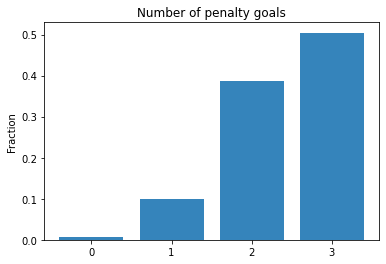

In [11]:
import matplotlib.pyplot as plt
plt.bar(values, counts/10000, align='center', alpha=0.9)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('Number of penalty goals')
plt.show()

Let's now look at the values and compare them with the theoretical result. Recall that the theoretical result was: $\{0.008,0.096,0.384,0.512\}$.

In [12]:
counts/10000

array([0.0074, 0.1004, 0.3877, 0.5045])

This seems pretty close to our theoretical result! Try using many more trials (50,000 or 100,000) and see how the sampling result changes!

## Summary

In this lecture, you learned about the Bernoulli and Binomial distributions, you learned how to use the formula for the Binomial distribution, and how to simulate Binomial trials to get to approximations of the Binomial distribution probabilities.